In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:

folder = ['Amazon','FlipKart','Combine','Walmart']
    
class FeatureSelection:
    def __init__(self,num):
        self.num = num
        self.title = folder[num]
        self.train, self.test = self.openFile()
    # initialise the train and test data
    def openFile(self):
        num = self.num
        print("----- OPEN "+folder[num]+" data ----- \n")
        trainData = pd.read_csv(folder[num]+'/X_train.csv')
        trainLabel = pd.read_csv(folder[num]+'/y_train.csv')
        testData = pd.read_csv(folder[num]+'/X_test.csv')
        testLabel = pd.read_csv(folder[num]+'/y_test.csv')
        self.target = pd.read_csv(folder[num]+'/label.csv')
        self.subtarget = pd.read_csv(folder[num]+'/sublabel.csv')

        if(num==0 or num==2):
            # For Description has nan row
            df = pd.concat([trainData,trainLabel], axis = 1)
            df = df.dropna(subset=['X_train'])
            trainData = pd.DataFrame({'X_train':df.X_train})
            trainLabel = pd.DataFrame({'category':df.category,'subcategory':df.subcategory})
            df = pd.concat([testData,testLabel], axis = 1)
            df = df.dropna(subset=['X_test'])
            testData = pd.DataFrame({'X_test':df.X_test})
            testLabel = pd.DataFrame({'category':df.category,'subcategory':df.subcategory})
        train = pd.concat([trainData, trainLabel], axis=1)
        test = pd.concat([testData, testLabel], axis=1)
        return train,test
    def get_targetName(self, text):
        target = self.target
        data = target[target['newLabel']==int(text)]
        return data['target'].values[0]
    def get_subtargetName(self, text):
        target = self.subtarget
        data = target[target['newSubLabel']==int(text)]
        return data['subtarget'].values[0]
    def documentCategoryDistribution(self):
        train = self.train
        title = self.title
        train['targetName'] = train['category'].apply(self.get_targetName)
        if (self.num == 2 or self.num ==3):
            train['targetName'] = train['targetName'].apply(str)
        numOfCategory = len(np.unique(train['category']))
        value_count =  train['targetName'].value_counts()
        fig, axs = plt.subplots(figsize=(numOfCategory/2,10))
        axs.bar(value_count.index, value_count.values)
        locs, labels = plt.xticks()
        plt.setp(labels, rotation=90)
        fig.savefig(title+"_category.png", bbox_inches='tight')
    def documentSubategoryDistributionin(self):
        train = self.train
        title = self.title
        train['targetName'] = train['subcategory'].apply(self.get_subtargetName)
        if (self.num == 2 or self.num ==3):
            train['targetName'] = train['targetName'].apply(str)
        numOfCategory = len(np.unique(train['subcategory']))
        value_count =  train['targetName'].value_counts()
        fig, axs = plt.subplots(figsize=(numOfCategory/2,10))
        axs.bar(value_count.index, value_count.values)
        locs, labels = plt.xticks()
        plt.setp(labels, rotation=90)
        fig.savefig(title+"_subcategory.png", bbox_inches='tight')

----- OPEN Amazon data ----- 



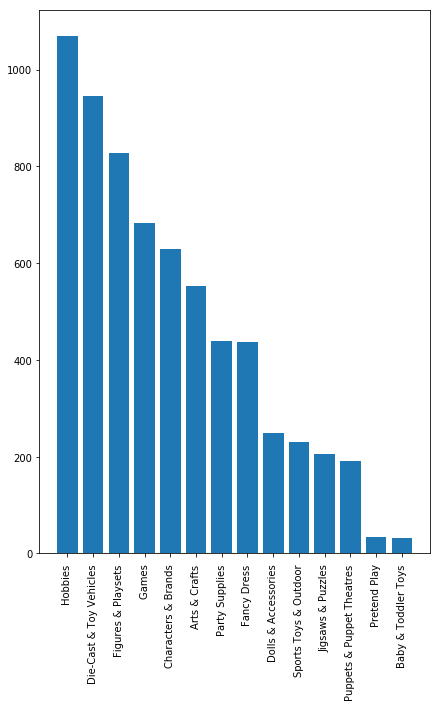

In [8]:
Fs = FeatureSelection(0)
Fs.documentCategoryDistribution()

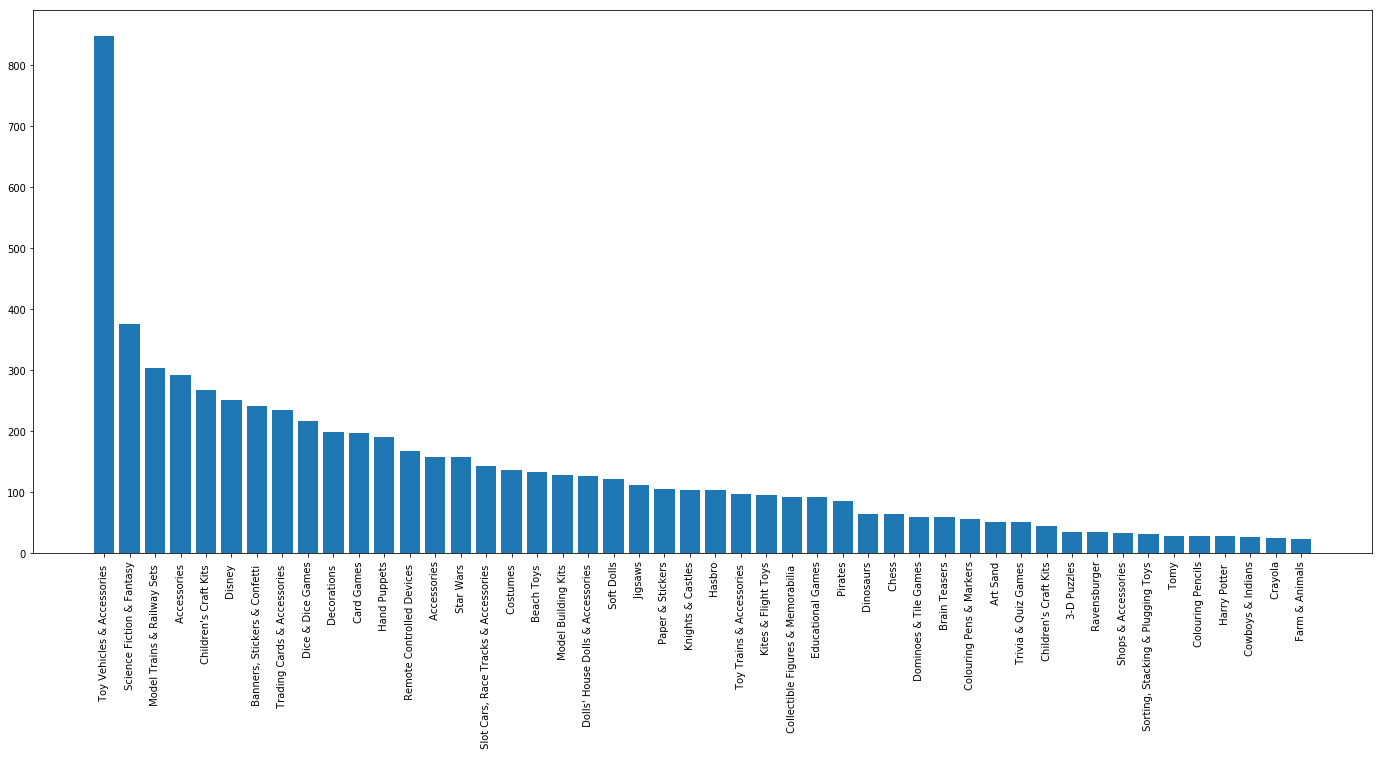

In [9]:
Fs.documentSubategoryDistributionin()

----- OPEN FlipKart data ----- 



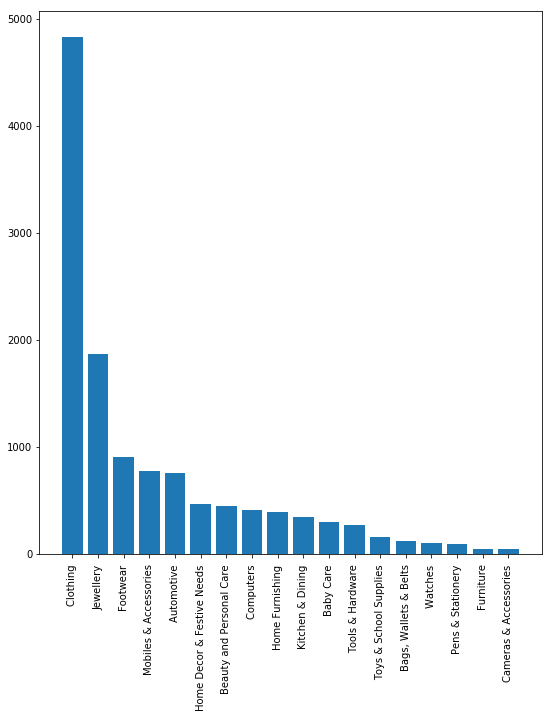

In [10]:
Fs = FeatureSelection(1)
Fs.documentCategoryDistribution()

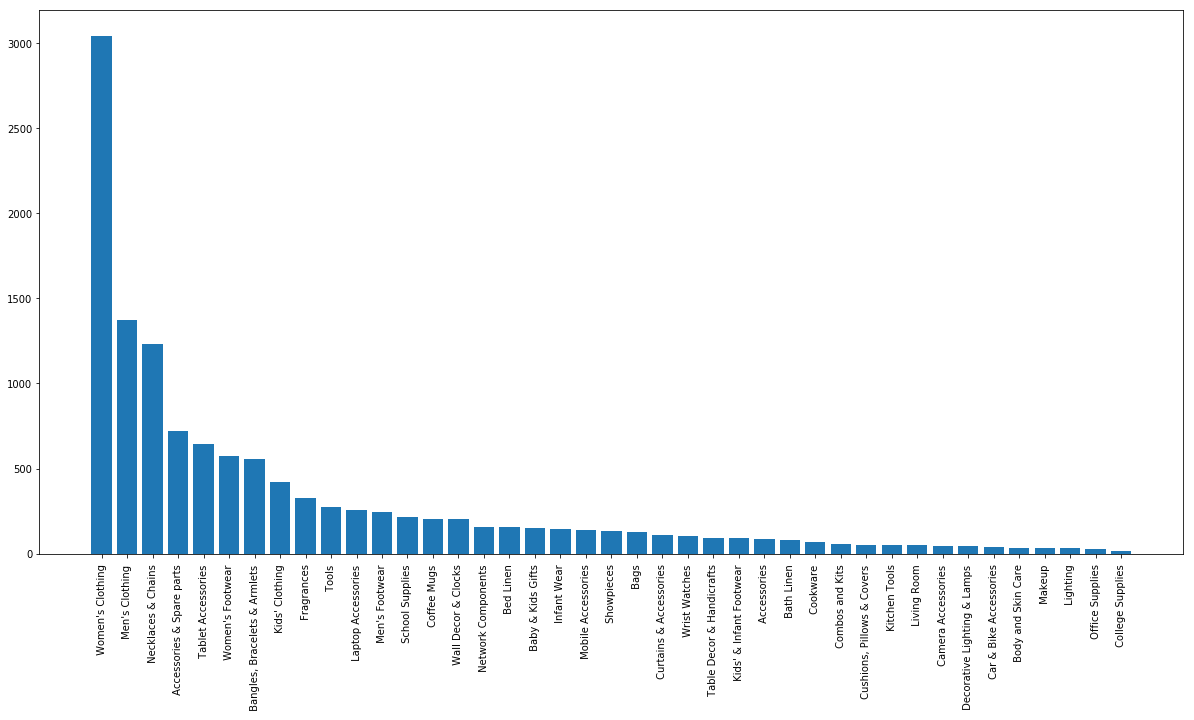

In [11]:
Fs.documentSubategoryDistributionin()

----- OPEN Combine data ----- 



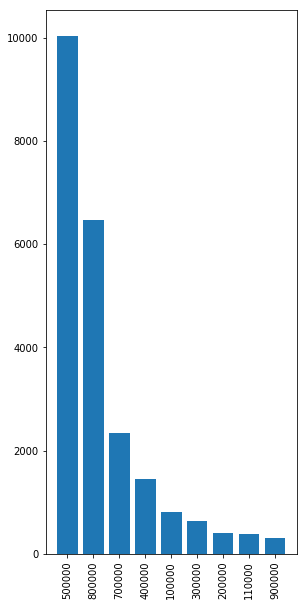

In [12]:
Fs = FeatureSelection(2)
Fs.documentCategoryDistribution()

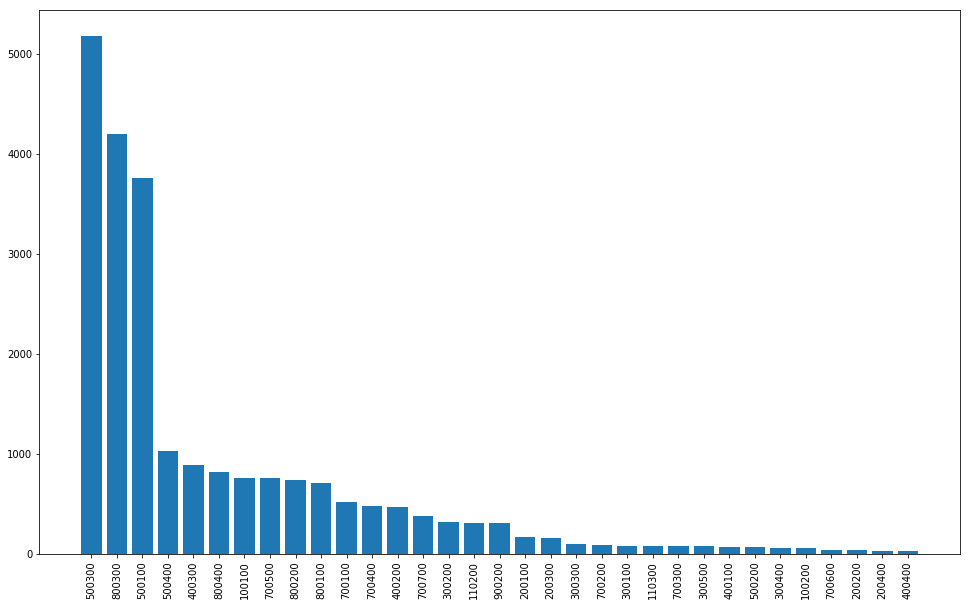

In [13]:
Fs.documentSubategoryDistributionin()

----- OPEN Walmart data ----- 



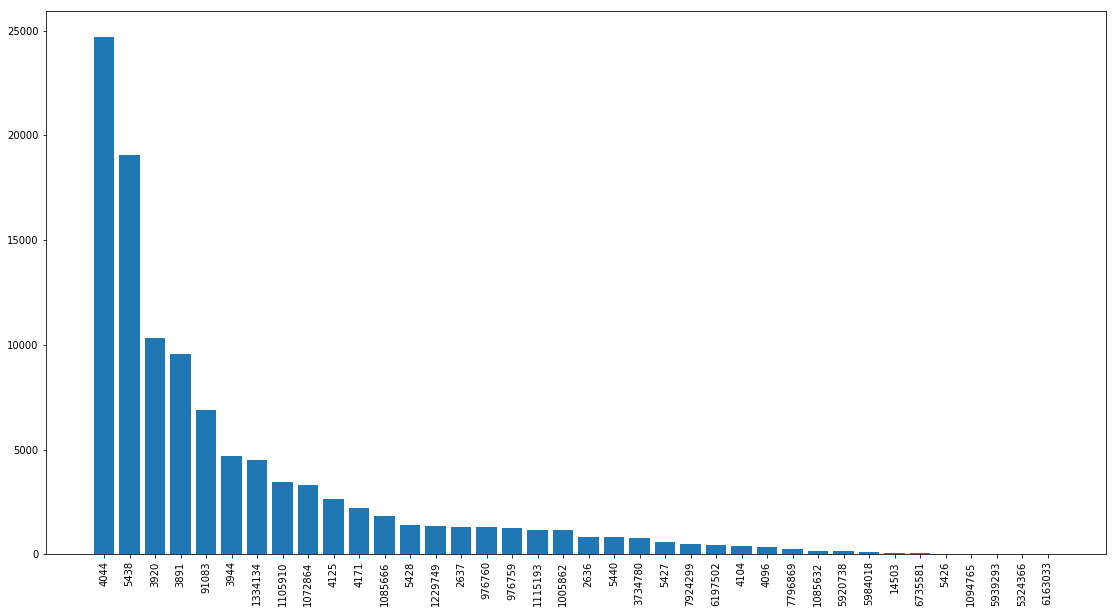

In [14]:
Fs = FeatureSelection(3)
Fs.documentCategoryDistribution()

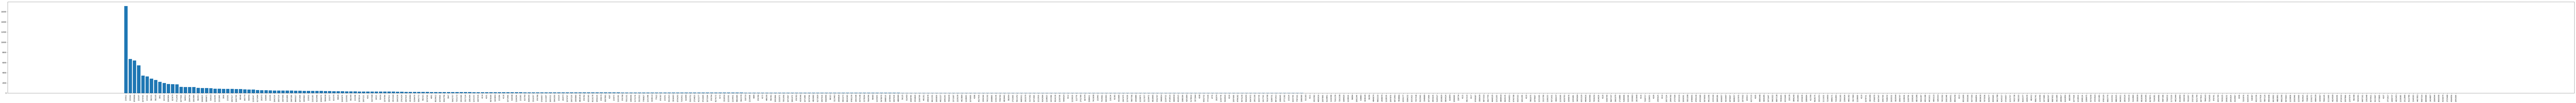

In [15]:
Fs.documentSubategoryDistributionin()